In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lightning import pytorch as pl
from sklearn.model_selection import train_test_split
import torch
torch.set_float32_matmul_precision('medium')
from chemprop import data, featurizers, models, nn
pl.seed_everything(1)
# from data_utils import data_prep, prep_data, load_data, split_data, preprocess_data, create_data_loaders, create_mpnn_model
%load_ext autoreload
%autoreload 2

Seed set to 1


In [3]:
# import pytorch_lightning as pl

class MetricTracker(pl.Callback):
    def __init__(self):
        self.metrics = []

    def on_validation_end(self, trainer, pl_module):
        self.metrics.append(trainer.callback_metrics)

    def save_metrics(self, file_path):
        metrics_dict = {}
        for metric_dict in self.metrics:
            for key, value in metric_dict.items():
                if key not in metrics_dict:
                    metrics_dict[key] = []
                metrics_dict[key].append(value.item())

        with open(file_path, 'w') as file:
            for key, values in metrics_dict.items():
                file.write(f"{key}: {values}\n")

In [4]:
def get_mol_datapoints(df, smiles_column, target_columns):
    smis = df.loc[:, smiles_column].values
    ys = df.loc[:, target_columns].values
    return [data.MoleculeDatapoint.from_smi(smi, y) for smi, y in zip(smis, ys)]

def get_data_loader(df, smiles_column, target_columns, batch_size, num_workers):
    data_points = get_mol_datapoints(df, smiles_column, target_columns)
    featurizer = featurizers.SimpleMoleculeMolGraphFeaturizer()

    dset = data.MoleculeDataset(data_points, featurizer)
    return data.MolGraphDataLoader(dset, num_workers=num_workers)

In [5]:
input_path = r'C:\Users\rhys-\OneDrive\Documents\Github\chemprop\notebooks\big_data\data\ir_dataset_minmax_scaled.parquet' # path to your data .csv file
num_workers = 0 # number of workers for dataloader. 0 means using main process for data loading
smiles_column = "smiles" # name of the column containing SMILES strings
target_columns = np.arange(400,4002,2).astype(str) # list of names of the columns containing targets

df_input = pd.read_parquet(input_path)

In [6]:
nist_test_path = r"C:\Users\rhys-\OneDrive\Documents\Github\thesis_results\data\nist\nist_test.parquet"

nist_test_df = pd.read_parquet(nist_test_path)

test_datapoints = get_mol_datapoints(nist_test_df, smiles_column, target_columns)

test_dset = data.MoleculeDataset(test_datapoints, featurizers.SimpleMoleculeMolGraphFeaturizer())

test_loader = data.MolGraphDataLoader(test_dset, num_workers=num_workers)


In [7]:
datapoints = get_mol_datapoints(df_input, smiles_column, target_columns)

train_idx, val_idx, test_idx = data.splitting.split_data(
    datapoints,
    num_folds=8,
    split='cv',
)

train_1 = [datapoints[i] for i in train_idx[0]]
val_1 = [datapoints[i] for i in val_idx[0]]
test_1 = [datapoints[i] for i in test_idx[0]]

train_2 = [datapoints[i] for i in train_idx[1]]
val_2 = [datapoints[i] for i in val_idx[1]]
test_2 = [datapoints[i] for i in test_idx[1]]

train_3 = [datapoints[i] for i in train_idx[2]]
val_3 = [datapoints[i] for i in val_idx[2]]
test_3 = [datapoints[i] for i in test_idx[2]]

train_4 = [datapoints[i] for i in train_idx[3]]
val_4 = [datapoints[i] for i in val_idx[3]]
test_4 = [datapoints[i] for i in test_idx[3]]

train_5 = [datapoints[i] for i in train_idx[4]]
val_5 = [datapoints[i] for i in val_idx[4]]
test_5 = [datapoints[i] for i in test_idx[4]]

train_6 = [datapoints[i] for i in train_idx[5]]
val_6 = [datapoints[i] for i in val_idx[5]]
test_6= [datapoints[i] for i in test_idx[5]]

train_7 = [datapoints[i] for i in train_idx[6]]
val_7 = [datapoints[i] for i in val_idx[6]]
test_7 = [datapoints[i] for i in test_idx[6]]

train_8 = [datapoints[i] for i in train_idx[7]]
val_8 = [datapoints[i] for i in val_idx[7]]
test_8 = [datapoints[i] for i in test_idx[7]]

def create_data_loaders(train_data, val_data, test_data, num_workers=0):
    featurizer = featurizers.SimpleMoleculeMolGraphFeaturizer()

    train_dset = data.MoleculeDataset(train_data, featurizer)
    val_dset = data.MoleculeDataset(val_data, featurizer)
    test_dset = data.MoleculeDataset(test_data, featurizer)

    train_loader = data.MolGraphDataLoader(train_dset, num_workers=num_workers)
    val_loader = data.MolGraphDataLoader(val_dset, num_workers=num_workers, shuffle=False)
    test_loader = data.MolGraphDataLoader(test_dset, num_workers=num_workers, shuffle=False)

    return train_loader, val_loader, test_loader

train_loader_1, val_loader_1, test_loader_1 = create_data_loaders(train_1, val_1, test_1, num_workers)
train_loader_2, val_loader_2, test_loader_2 = create_data_loaders(train_2, val_2, test_2, num_workers)
train_loader_3, val_loader_3, test_loader_3 = create_data_loaders(train_3, val_3, test_3, num_workers)
train_loader_4, val_loader_4, test_loader_4 = create_data_loaders(train_4, val_4, test_4, num_workers)
train_loader_5, val_loader_5, test_loader_5 = create_data_loaders(train_5, val_5, test_5, num_workers)
train_loader_6, val_loader_6, test_loader_6 = create_data_loaders(train_6, val_6, test_6, num_workers)
train_loader_7, val_loader_7, test_loader_7 = create_data_loaders(train_7, val_7, test_7, num_workers)
train_loader_8, val_loader_8, test_loader_8 = create_data_loaders(train_8, val_8, test_8, num_workers)


In [8]:
def create_rndm_loader(test_data):
    featurizer = featurizers.SimpleMoleculeMolGraphFeaturizer()


    test_dset = data.MoleculeDataset(test_data, featurizer)

    return data.MolGraphDataLoader(test_dset, num_workers=0)

rndm_test_loader = create_rndm_loader(test_1[:700])

In [9]:
def create_model(metric: str, agg: str = 'mean'):
    mp = nn.BondMessagePassing(
    depth = 6,
    d_h = 2200,
    dropout=0.05,
    # activation='SILU'
)
    if agg == 'mean':
        agg = nn.MeanAggregation(

        )

    elif agg == 'attentive':
        agg = nn.AttentiveAggregation(
            output_size=2200,
        )

    elif agg == 'sum': 
        agg = nn.SumAggregation(
        )
    else:
        raise ValueError(f'Invalid aggregation: {agg}')

    # agg = nn.AttentiveAggregation(
    #     output_size=2200,
    # )

    ffn = nn.RegressionFFN(
        input_dim=2200,
        n_layers=6,
        hidden_dim=2200,
        dropout=0.05,
        # activation='SILU',
        # loc=scaler.mean_, # pass in the mean of the training targets
        # scale=scaler.scale_,
        n_tasks=1801 # pass in the scale of the training targets
    )
    batch_norm=False
    if metric == 'rmse':
        metric_list = [nn.RMSEMetric()]
    elif metric == 'sid':
        metric_list = [nn.SIDMetric(), nn.RMSEMetric()]

    else:
        raise ValueError(f'Invalid metric: {metric}')
    return models.MPNN(mp, agg, ffn, batch_norm, metrics=metric_list)

mpnn1 = create_model('rmse', 'attentive')
mpnn2 = create_model('rmse', 'attentive')
mpnn3 = create_model('rmse', 'attentive')
mpnn4 = create_model('rmse', 'attentive')
mpnn5 = create_model('rmse', 'attentive')
mpnn6 = create_model('rmse', 'attentive')
mpnn7 = create_model('rmse', 'attentive')
mpnn8 = create_model('rmse', 'attentive')


In [43]:
class MetricTracker(pl.Callback):
    def __init__(self):
        self.metrics = []

    def on_validation_end(self, trainer, pl_module):
        self.metrics.append(trainer.callback_metrics)

    def save_metrics(self, file_path):
        metrics_dict = {}
        for metric_dict in self.metrics:
            for key, value in metric_dict.items():
                if key not in metrics_dict:
                    metrics_dict[key] = []
                metrics_dict[key].append(value.item())

        with open(file_path, 'w') as file:
            for key, values in metrics_dict.items():
                file.write(f"{key}: {values}\n")

metric_tracker = MetricTracker()

early_stop_callback = pl.callbacks.EarlyStopping(
    monitor='val_loss',  # Specify the metric to monitor
    min_delta=0.00,  # Minimum change in the monitored metric needed to qualify as an improvement
    patience=3,  # Number of epochs with no improvement after which training will be stopped
    verbose=False,  # Whether to print messages when early stopping is triggered
    mode='min'  # Whether the monitored metric should be minimized or maximized
)




trainer_1 = pl.Trainer(
    precision='bf16-mixed',
    logger=True,
    enable_checkpointing=False, # Use `True` if you want to save model checkpoints. The checkpoints will be saved in the `checkpoints` folder.
    enable_progress_bar=True,
    accelerator="auto",
    devices=1,
    max_epochs=10, # number of epochs to train for
    # callbacks=[metric_tracker, early_stop_callback]
)

trainer_2 = pl.Trainer(
    precision='bf16-mixed',
    logger=True,
    enable_checkpointing=False, # Use `True` if you want to save model checkpoints. The checkpoints will be saved in the `checkpoints` folder.
    enable_progress_bar=True,
    accelerator="auto",
    devices=1,
    max_epochs=10, # number of epochs to train for
)

trainer_3 = pl.Trainer(
    precision='bf16-mixed',
    logger=True,
    enable_checkpointing=False, # Use `True` if you want to save model checkpoints. The checkpoints will be saved in the `checkpoints` folder.
    enable_progress_bar=True,
    accelerator="auto",
    devices=1,
    max_epochs=10, # number of epochs to train for
    # callbacks=[metric_tracker, early_stop_callback]
)

trainer_4 = pl.Trainer(
    precision='bf16-mixed',
    logger=True,
    enable_checkpointing=False, # Use `True` if you want to save model checkpoints. The checkpoints will be saved in the `checkpoints` folder.
    enable_progress_bar=True,
    accelerator="auto",
    devices=1,
    max_epochs=10, # number of epochs to train for
)

trainer_5 = pl.Trainer(
    precision='bf16-mixed',
    logger=True,
    enable_checkpointing=False, # Use `True` if you want to save model checkpoints. The checkpoints will be saved in the `checkpoints` folder.
    enable_progress_bar=True,
    accelerator="auto",
    devices=1,
    max_epochs=10, # number of epochs to train for
    # callbacks=[metric_tracker, early_stop_callback]
)

trainer_6 = pl.Trainer(
    precision='bf16-mixed',
    logger=True,
    enable_checkpointing=False, # Use `True` if you want to save model checkpoints. The checkpoints will be saved in the `checkpoints` folder.
    enable_progress_bar=True,
    accelerator="auto",
    devices=1,
    max_epochs=10, # number of epochs to train for
)

trainer_7 = pl.Trainer(
    precision='bf16-mixed',
    logger=True,
    enable_checkpointing=False, # Use `True` if you want to save model checkpoints. The checkpoints will be saved in the `checkpoints` folder.
    enable_progress_bar=True,
    accelerator="auto",
    devices=1,
    max_epochs=10, # number of epochs to train for
)

trainer_8 = pl.Trainer(
    precision='bf16-mixed',
    logger=True,
    enable_checkpointing=False, # Use `True` if you want to save model checkpoints. The checkpoints will be saved in the `checkpoints` folder.
    enable_progress_bar=True,
    accelerator="auto",
    devices=1,
    max_epochs=10, # number of epochs to train for
)




Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Using

In [44]:
trainer_1.fit(mpnn1, train_loader_1, val_loader_1)
trainer_2.fit(mpnn2, train_loader_2, val_loader_2)
trainer_3.fit(mpnn3, train_loader_3, val_loader_3)
trainer_4.fit(mpnn4, train_loader_4, val_loader_4)
trainer_5.fit(mpnn5, train_loader_5, val_loader_5)
trainer_6.fit(mpnn6, train_loader_6, val_loader_6)
trainer_7.fit(mpnn7, train_loader_7, val_loader_7)
trainer_8.fit(mpnn8, train_loader_8, val_loader_8)



LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loading `train_dataloader` to estimate number of stepping batches.
c:\Users\rhys-\miniconda3\envs\cp3\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.

  | Name            | Type                 | Params
---------------------------------------------------------
0 | message_passing | BondMessagePassing   | 10.3 M
1 | agg             | AttentiveAggregation | 2.2 K 
2 | bn              | Identity             | 0     
3 | predictor       | RegressionFFN        | 33.0 M
  | other params    | n/a                  | 1.8 K 
---------------------------------------------------------
43.3 M    Trainable params
1.8 K     Non-trainable params
43.3 M    Total params
173.278   Total estimated model params size (MB)


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

c:\Users\rhys-\miniconda3\envs\cp3\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Epoch 9: 100%|██████████| 1948/1948 [01:08<00:00, 28.28it/s, v_num=45, train/loss=0.00337, val_loss=0.0542]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 1948/1948 [01:08<00:00, 28.28it/s, v_num=45, train/loss=0.00337, val_loss=0.0542]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loading `train_dataloader` to estimate number of stepping batches.

  | Name            | Type                 | Params
---------------------------------------------------------
0 | message_passing | BondMessagePassing   | 10.3 M
1 | agg             | AttentiveAggregation | 2.2 K 
2 | bn              | Identity             | 0     
3 | predictor       | RegressionFFN        | 33.0 M
  | other params    | n/a                  | 1.8 K 
---------------------------------------------------------
43.3 M    Trainable params
1.8 K     Non-trainable params
43.3 M    Total params
173.278   Total estimated model params size (MB)


Epoch 9: 100%|██████████| 1948/1948 [01:07<00:00, 28.83it/s, v_num=46, train/loss=0.00258, val_loss=0.0544]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 1948/1948 [01:07<00:00, 28.83it/s, v_num=46, train/loss=0.00258, val_loss=0.0544]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loading `train_dataloader` to estimate number of stepping batches.

  | Name            | Type                 | Params
---------------------------------------------------------
0 | message_passing | BondMessagePassing   | 10.3 M
1 | agg             | AttentiveAggregation | 2.2 K 
2 | bn              | Identity             | 0     
3 | predictor       | RegressionFFN        | 33.0 M
  | other params    | n/a                  | 1.8 K 
---------------------------------------------------------
43.3 M    Trainable params
1.8 K     Non-trainable params
43.3 M    Total params
173.278   Total estimated model params size (MB)


Epoch 9: 100%|██████████| 1948/1948 [01:07<00:00, 28.92it/s, v_num=47, train/loss=0.0029, val_loss=0.0541] 

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 1948/1948 [01:07<00:00, 28.92it/s, v_num=47, train/loss=0.0029, val_loss=0.0541]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loading `train_dataloader` to estimate number of stepping batches.

  | Name            | Type                 | Params
---------------------------------------------------------
0 | message_passing | BondMessagePassing   | 10.3 M
1 | agg             | AttentiveAggregation | 2.2 K 
2 | bn              | Identity             | 0     
3 | predictor       | RegressionFFN        | 33.0 M
  | other params    | n/a                  | 1.8 K 
---------------------------------------------------------
43.3 M    Trainable params
1.8 K     Non-trainable params
43.3 M    Total params
173.278   Total estimated model params size (MB)


Epoch 9: 100%|██████████| 1948/1948 [01:07<00:00, 28.85it/s, v_num=48, train/loss=0.00169, val_loss=0.0546]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 1948/1948 [01:07<00:00, 28.85it/s, v_num=48, train/loss=0.00169, val_loss=0.0546]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loading `train_dataloader` to estimate number of stepping batches.

  | Name            | Type                 | Params
---------------------------------------------------------
0 | message_passing | BondMessagePassing   | 10.3 M
1 | agg             | AttentiveAggregation | 2.2 K 
2 | bn              | Identity             | 0     
3 | predictor       | RegressionFFN        | 33.0 M
  | other params    | n/a                  | 1.8 K 
---------------------------------------------------------
43.3 M    Trainable params
1.8 K     Non-trainable params
43.3 M    Total params
173.278   Total estimated model params size (MB)


Epoch 9: 100%|██████████| 1948/1948 [01:07<00:00, 28.70it/s, v_num=49, train/loss=0.00278, val_loss=0.0541]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 1948/1948 [01:07<00:00, 28.70it/s, v_num=49, train/loss=0.00278, val_loss=0.0541]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loading `train_dataloader` to estimate number of stepping batches.

  | Name            | Type                 | Params
---------------------------------------------------------
0 | message_passing | BondMessagePassing   | 10.3 M
1 | agg             | AttentiveAggregation | 2.2 K 
2 | bn              | Identity             | 0     
3 | predictor       | RegressionFFN        | 33.0 M
  | other params    | n/a                  | 1.8 K 
---------------------------------------------------------
43.3 M    Trainable params
1.8 K     Non-trainable params
43.3 M    Total params
173.278   Total estimated model params size (MB)


Epoch 9: 100%|██████████| 1948/1948 [01:07<00:00, 28.83it/s, v_num=50, train/loss=0.00365, val_loss=0.0542]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 1948/1948 [01:07<00:00, 28.83it/s, v_num=50, train/loss=0.00365, val_loss=0.0542]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loading `train_dataloader` to estimate number of stepping batches.

  | Name            | Type                 | Params
---------------------------------------------------------
0 | message_passing | BondMessagePassing   | 10.3 M
1 | agg             | AttentiveAggregation | 2.2 K 
2 | bn              | Identity             | 0     
3 | predictor       | RegressionFFN        | 33.0 M
  | other params    | n/a                  | 1.8 K 
---------------------------------------------------------
43.3 M    Trainable params
1.8 K     Non-trainable params
43.3 M    Total params
173.278   Total estimated model params size (MB)


Epoch 9: 100%|██████████| 1948/1948 [01:07<00:00, 28.80it/s, v_num=51, train/loss=0.00417, val_loss=0.0542]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 1948/1948 [01:07<00:00, 28.80it/s, v_num=51, train/loss=0.00417, val_loss=0.0542]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loading `train_dataloader` to estimate number of stepping batches.

  | Name            | Type                 | Params
---------------------------------------------------------
0 | message_passing | BondMessagePassing   | 10.3 M
1 | agg             | AttentiveAggregation | 2.2 K 
2 | bn              | Identity             | 0     
3 | predictor       | RegressionFFN        | 33.0 M
  | other params    | n/a                  | 1.8 K 
---------------------------------------------------------
43.3 M    Trainable params
1.8 K     Non-trainable params
43.3 M    Total params
173.278   Total estimated model params size (MB)


Epoch 9: 100%|██████████| 1948/1948 [01:07<00:00, 28.73it/s, v_num=52, train/loss=0.0024, val_loss=0.0544] 

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 1948/1948 [01:07<00:00, 28.73it/s, v_num=52, train/loss=0.0024, val_loss=0.0544]


In [45]:
model_1_preds = trainer_1.predict(mpnn1, test_loader)
model_2_preds = trainer_2.predict(mpnn2, test_loader)
model_3_preds = trainer_3.predict(mpnn3, test_loader)
model_4_preds = trainer_4.predict(mpnn4, test_loader)
model_5_preds = trainer_5.predict(mpnn5, test_loader)
model_6_preds = trainer_6.predict(mpnn6, test_loader)
model_7_preds = trainer_7.predict(mpnn7, test_loader)
model_8_preds = trainer_8.predict(mpnn8, test_loader)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\rhys-\miniconda3\envs\cp3\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:492: Your `predict_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
c:\Users\rhys-\miniconda3\envs\cp3\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 767/767 [00:04<00:00, 159.97it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting DataLoader 0: 100%|██████████| 767/767 [00:03<00:00, 198.35it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting DataLoader 0: 100%|██████████| 767/767 [00:04<00:00, 185.76it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting DataLoader 0: 100%|██████████| 767/767 [00:03<00:00, 202.80it/s]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 767/767 [00:03<00:00, 203.34it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting DataLoader 0: 100%|██████████| 767/767 [00:03<00:00, 207.97it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting DataLoader 0: 100%|██████████| 767/767 [00:03<00:00, 202.64it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting DataLoader 0: 100%|██████████| 767/767 [00:03<00:00, 203.83it/s]


In [46]:
# model_1_preds_rndm = trainer_1.predict(mpnn1, test_loader)
# model_2_preds_rndm = trainer_2.predict(mpnn2, test_loader)
# model_3_preds_rndm = trainer_3.predict(mpnn3, test_loader)
# model_4_preds_rndm = trainer_4.predict(mpnn4, test_loader)
# model_5_preds_rndm = trainer_5.predict(mpnn5, test_loader)
# model_6_preds_rndm = trainer_6.predict(mpnn6, test_loader)
# model_7_preds_rndm = trainer_7.predict(mpnn7, test_loader)
# model_8_preds_rndm = trainer_8.predict(mpnn8, test_loader)

model_1_preds_rndm = trainer_1.predict(mpnn1, test_loader)
model_2_preds_rndm = trainer_2.predict(mpnn2, test_loader)
model_3_preds_rndm = trainer_3.predict(mpnn3, test_loader)
model_4_preds_rndm = trainer_4.predict(mpnn4, test_loader)
model_5_preds_rndm = trainer_5.predict(mpnn5, test_loader)
model_6_preds_rndm = trainer_6.predict(mpnn6, test_loader)
model_7_preds_rndm = trainer_7.predict(mpnn7, test_loader)
model_8_preds_rndm = trainer_8.predict(mpnn8, test_loader)
# convert preds to float32

model_1_preds_rndm = [pred.float() for pred in model_1_preds_rndm]
model_2_preds_rndm = [pred.float() for pred in model_2_preds_rndm]
model_3_preds_rndm = [pred.float() for pred in model_3_preds_rndm]
model_4_preds_rndm = [pred.float() for pred in model_4_preds_rndm]
model_5_preds_rndm = [pred.float() for pred in model_5_preds_rndm]
model_6_preds_rndm = [pred.float() for pred in model_6_preds_rndm]
model_7_preds_rndm = [pred.float() for pred in model_7_preds_rndm]
model_8_preds_rndm = [pred.float() for pred in model_8_preds_rndm]

single_model_preds_rndm = model_1_preds_rndm
two_model_ensemble_preds_rndm = [torch.mean(torch.stack([model_1_preds_rndm[i], model_2_preds_rndm[i]]), dim=0) for i in range(len(model_1_preds_rndm))]
three_model_ensemble_preds_rndm = [torch.mean(torch.stack([model_1_preds_rndm[i], model_2_preds_rndm[i], model_3_preds_rndm[i]]), dim=0) for i in range(len(model_1_preds_rndm))]
four_model_ensemble_preds_rndm = [torch.mean(torch.stack([model_1_preds_rndm[i], model_2_preds_rndm[i], model_3_preds_rndm[i], model_4_preds_rndm[i]]), dim=0) for i in range(len(model_1_preds_rndm))]
five_model_ensemble_preds_rndm = [torch.mean(torch.stack([model_1_preds_rndm[i], model_2_preds_rndm[i], model_3_preds_rndm[i], model_4_preds_rndm[i], model_5_preds_rndm[i]]), dim=0) for i in range(len(model_1_preds_rndm))]
six_model_ensemble_preds_rndm = [torch.mean(torch.stack([model_1_preds_rndm[i], model_2_preds_rndm[i], model_3_preds_rndm[i], model_4_preds_rndm[i], model_5_preds_rndm[i], model_6_preds_rndm[i]]), dim=0) for i in range(len(model_1_preds_rndm))]
seven_model_ensemble_preds_rndm = [torch.mean(torch.stack([model_1_preds_rndm[i], model_2_preds_rndm[i], model_3_preds_rndm[i], model_4_preds_rndm[i], model_5_preds_rndm[i], model_6_preds_rndm[i], model_7_preds_rndm[i]]), dim=0) for i in range(len(model_1_preds_rndm))]
eight_model_ensemble_preds_rndm = [torch.mean(torch.stack([model_1_preds_rndm[i], model_2_preds_rndm[i], model_3_preds_rndm[i], model_4_preds_rndm[i], model_5_preds_rndm[i], model_6_preds_rndm[i], model_7_preds_rndm[i], model_8_preds_rndm[i]]), dim=0) for i in range(len(model_1_preds_rndm))]






LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 767/767 [00:03<00:00, 205.14it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting DataLoader 0: 100%|██████████| 767/767 [00:03<00:00, 200.42it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting DataLoader 0: 100%|██████████| 767/767 [00:04<00:00, 168.47it/s]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 767/767 [00:04<00:00, 190.65it/s]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 767/767 [00:04<00:00, 186.21it/s]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 767/767 [00:04<00:00, 186.35it/s]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 767/767 [00:03<00:00, 196.06it/s]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 767/767 [00:04<00:00, 181.22it/s]


In [47]:
import matplotlib.pyplot as plt

# convert rmse preds to float32
model_1_preds = [pred.float() for pred in model_1_preds]
model_2_preds = [pred.float() for pred in model_2_preds]
model_3_preds = [pred.float() for pred in model_3_preds]
model_4_preds = [pred.float() for pred in model_4_preds]
model_5_preds = [pred.float() for pred in model_5_preds]
model_6_preds = [pred.float() for pred in model_6_preds]
model_7_preds = [pred.float() for pred in model_7_preds]
model_8_preds = [pred.float() for pred in model_8_preds]


single_model_preds = model_1_preds

two_model_ensemble_preds = [torch.mean(torch.stack(preds), dim=0) for preds in zip(model_1_preds, model_2_preds)]
three_model_ensemble_preds = [torch.mean(torch.stack(preds), dim=0) for preds in zip(model_1_preds, model_2_preds, model_3_preds)]
four_model_ensemble_preds = [torch.mean(torch.stack(preds), dim=0) for preds in zip(model_1_preds, model_2_preds, model_3_preds, model_4_preds)]
five_model_ensemble_preds = [torch.mean(torch.stack(preds), dim=0) for preds in zip(model_1_preds, model_2_preds, model_3_preds, model_4_preds, model_5_preds)]
six_model_ensemble_preds = [torch.mean(torch.stack(preds), dim=0) for preds in zip(model_1_preds, model_2_preds, model_3_preds, model_4_preds, model_5_preds, model_6_preds)]
seven_model_ensemble_preds = [torch.mean(torch.stack(preds), dim=0) for preds in zip(model_1_preds, model_2_preds, model_3_preds, model_4_preds, model_5_preds, model_6_preds, model_7_preds)]


eight_model_ensemble_preds = [torch.mean(torch.stack(preds), dim=0) for preds in zip(model_1_preds, model_2_preds, model_3_preds, model_4_preds, model_5_preds, model_6_preds, model_7_preds, model_8_preds)]



In [48]:
import numpy as np

def calculate_rmse(predicted_spectra, reference_spectra):
    if len(predicted_spectra) != len(reference_spectra):
        print(len(predicted_spectra), len(reference_spectra))
        raise ValueError("Length of predicted and reference spectra lists should be the same.")

    rmse_values = []

    for i in range(len(predicted_spectra)):
        predicted = np.array(predicted_spectra[i]).squeeze()
        reference = np.array(reference_spectra[i]).squeeze()

        if len(predicted) != len(reference):
            print(len(predicted), len(reference))
            raise ValueError(f"Length of predicted and reference spectra at index {i} should be the same.")

        mse = np.mean((predicted - reference) ** 2)
        rmse = np.sqrt(mse)
        rmse_values.append(rmse)

    return rmse_values

two_model_ensemble_rmse = calculate_rmse(two_model_ensemble_preds, list(nist_test_df.iloc[:, :-1].values))
three_model_ensemble_rmse = calculate_rmse(three_model_ensemble_preds, list(nist_test_df.iloc[:, :-1].values))
four_model_ensemble_rmse = calculate_rmse(four_model_ensemble_preds, list(nist_test_df.iloc[:, :-1].values))
five_model_ensemble_rmse = calculate_rmse(five_model_ensemble_preds, list(nist_test_df.iloc[:, :-1].values))
six_model_ensemble_rmse = calculate_rmse(six_model_ensemble_preds, list(nist_test_df.iloc[:, :-1].values))
seven_model_ensemble_rmse = calculate_rmse(seven_model_ensemble_preds, list(nist_test_df.iloc[:, :-1].values))
eight_model_ensemble_rmse = calculate_rmse(eight_model_ensemble_preds, list(nist_test_df.iloc[:, :-1].values))



ensemble_rmse = calculate_rmse(ensemble_preds, list(nist_test_df.iloc[:, :-1].values))

single_model_rmse = calculate_rmse(model_1_preds, list(nist_test_df.iloc[:, :-1].values))

In [49]:
single_model_rmse_rndm = calculate_rmse(single_model_preds_rndm, list(list(nist_test_df.iloc[:, :-1].values)))
two_model_ensemble_rmse_rndm = calculate_rmse(two_model_ensemble_preds_rndm, list(list(nist_test_df.iloc[:, :-1].values)))
three_model_ensemble_rmse_rndm = calculate_rmse(three_model_ensemble_preds_rndm, list(list(nist_test_df.iloc[:, :-1].values)))
four_model_ensemble_rmse_rndm = calculate_rmse(four_model_ensemble_preds_rndm, list(list(nist_test_df.iloc[:, :-1].values)))
five_model_ensemble_rmse_rndm = calculate_rmse(five_model_ensemble_preds_rndm, list(list(nist_test_df.iloc[:, :-1].values)))
six_model_ensemble_rmse_rndm = calculate_rmse(six_model_ensemble_preds_rndm, list(list(nist_test_df.iloc[:, :-1].values)))
seven_model_ensemble_rmse_rndm = calculate_rmse(seven_model_ensemble_preds_rndm, list(list(nist_test_df.iloc[:, :-1].values)))
eight_model_ensemble_rmse_rndm = calculate_rmse(eight_model_ensemble_preds_rndm, list(list(nist_test_df.iloc[:, :-1].values)))




In [50]:
rmse_df.groupby('Model').describe()

RMSE                                                    \
                      count      mean       std       min       25%       50%   
Model                                                                           
Eight Model Ensemble  767.0  0.090205  0.042158  0.036221  0.067608  0.085469   
Five Model Ensemble   767.0  0.090509  0.042032  0.035605  0.068252  0.085483   
Four Model Ensemble   767.0  0.090425  0.042085  0.035141  0.067749  0.085566   
Seven Model Ensemble  767.0  0.090236  0.042137  0.034992  0.067661  0.085486   
Single Model          767.0  0.091043  0.042355  0.036126  0.068026  0.087235   
Six Model Ensemble    767.0  0.090245  0.042152  0.034852  0.067820  0.085374   
Three Model Ensemble  767.0  0.090432  0.042138  0.035750  0.067772  0.085863   
Two Model Ensemble    767.0  0.090649  0.042244  0.035707  0.068026  0.086377   

                                          
                           75%       max  
Model                                     
Eight Model Ensemble  0.104758  0.985049  
Five Model Ensemble   0.105014  0.984880  
Four Model Ensemble   0.105038  0.984668  
Seven Model Ensemble  0.104997  0.984959  
Single Model          0.106245  0.982922  
Six Model Ensemble    0.105041  0.984957  
Three Model Ensemble  0.104768  0.984473  
Two Model Ensemble    0.105364  0.984376

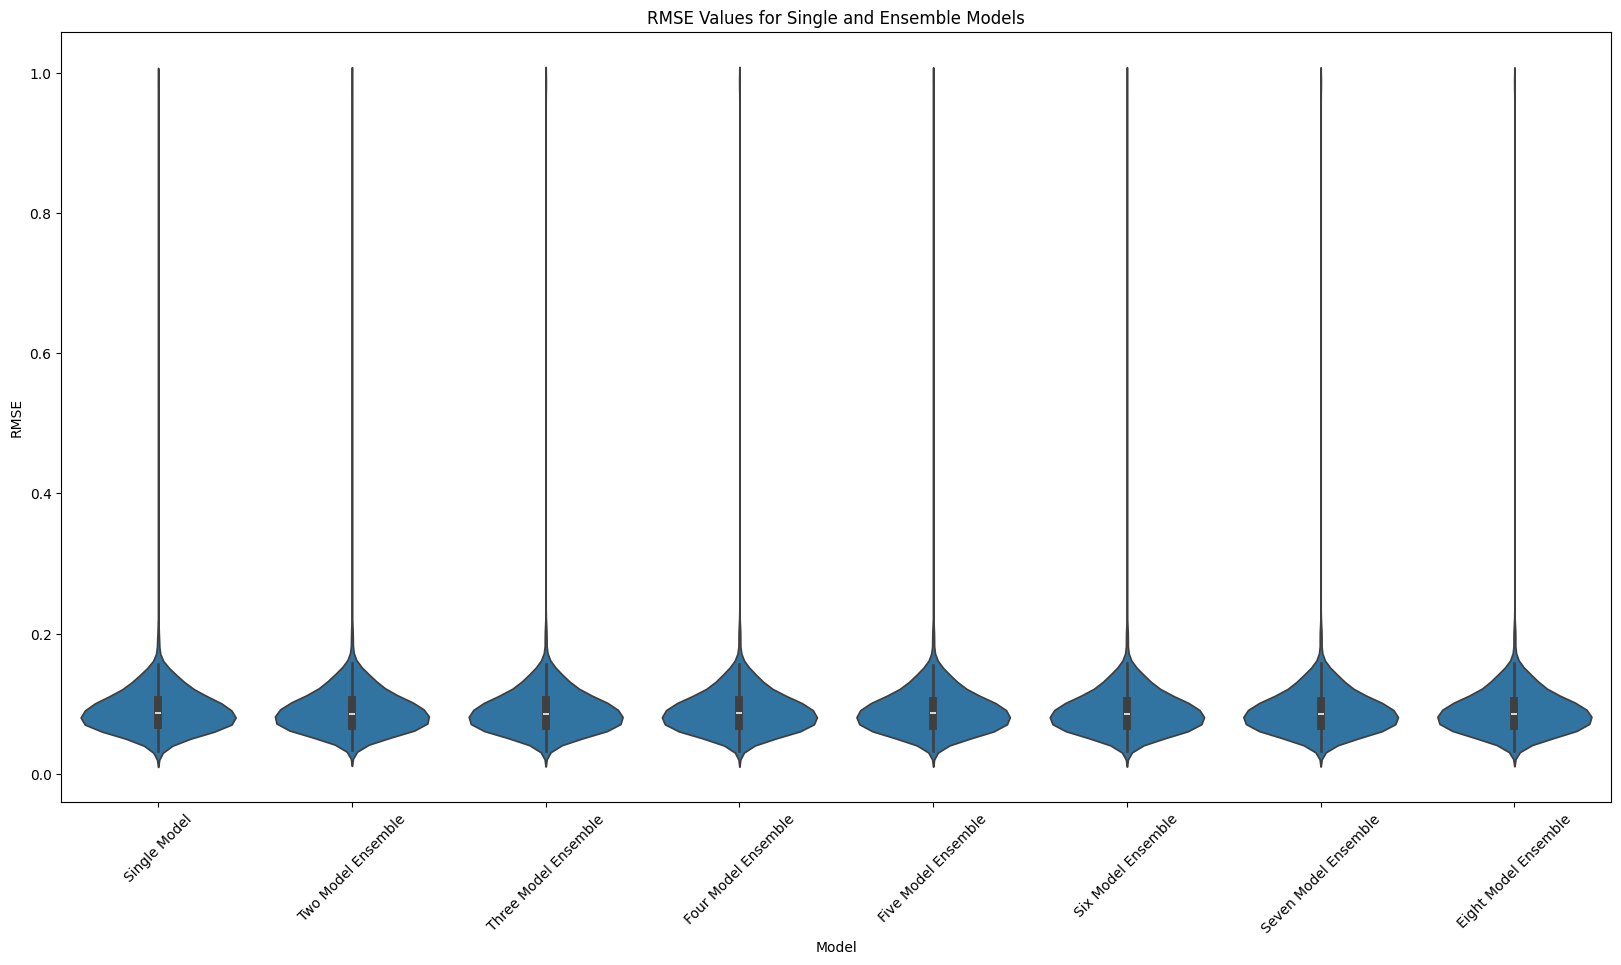

In [51]:
# create a violin plot of the rmse values
import seaborn as sns
import pandas as pd

rmse_values = single_model_rmse_rndm + two_model_ensemble_rmse_rndm + three_model_ensemble_rmse_rndm + four_model_ensemble_rmse_rndm + five_model_ensemble_rmse_rndm + six_model_ensemble_rmse_rndm + seven_model_ensemble_rmse_rndm + eight_model_ensemble_rmse_rndm

model_names = ['Single Model'] * len(single_model_rmse_rndm) + ['Two Model Ensemble'] * len(two_model_ensemble_rmse_rndm) + ['Three Model Ensemble'] * len(three_model_ensemble_rmse_rndm) + ['Four Model Ensemble'] * len(four_model_ensemble_rmse_rndm) + ['Five Model Ensemble'] * len(five_model_ensemble_rmse_rndm) + ['Six Model Ensemble'] * len(six_model_ensemble_rmse_rndm) + ['Seven Model Ensemble'] * len(seven_model_ensemble_rmse_rndm) + ['Eight Model Ensemble'] * len(eight_model_ensemble_rmse_rndm)

rmse_df = pd.DataFrame({'RMSE': rmse_values})

rmse_df['Model'] = model_names

plt.figure(figsize=(20, 10))
sns.violinplot(x='Model', y='RMSE', data=rmse_df)
plt.xticks(rotation=45)
plt.title('RMSE Values for Single and Ensemble Models')
plt.show()



In [52]:
def calculate_sis(predicted_spectra, reference_spectra):
    if len(predicted_spectra) != len(reference_spectra):
        print(len(predicted_spectra), len(reference_spectra))
        raise ValueError("Length of predicted and reference spectra lists should be the same.")

    sis_values = []

    for i in range(len(predicted_spectra)):
        predicted = np.array(predicted_spectra[i]).squeeze()
        reference = np.array(reference_spectra[i]).squeeze()

        if len(predicted) != len(reference):
            print(len(predicted), len(reference))
            raise ValueError(f"Length of predicted and reference spectra at index {i} should be the same.")

        # Set any negative values to zero
        predicted[predicted < 0] = 0
        reference[reference < 0] = 0

        # Add a small constant to avoid taking log of zero
        epsilon = 1e-10
        predicted += epsilon
        reference += epsilon

        # Ensure the spectra are normalized
        predicted = predicted / np.sum(predicted)
        reference = reference / np.sum(reference)

        # Check for negative values
        if np.any(predicted < 0) or np.any(reference < 0):
            raise ValueError("Spectra contain negative values")

        # Check for zero values
        if np.any(predicted == 0) or np.any(reference == 0):
            raise ValueError("Spectra contain zero values")

        # Calculate the SID
        sid = np.sum(predicted * np.log(predicted / reference)) + np.sum(reference * np.log(reference / predicted))

        # Calculate the SIS
        sis = 1 / (1 + sid)
        sis_values.append(sis)

    return sis_values

ensemble_sis = calculate_sis(ensemble_preds, list(nist_test_df.iloc[:, :-1].values))

single_model_sis = calculate_sis(model_1_preds, list(nist_test_df.iloc[:, :-1].values))














































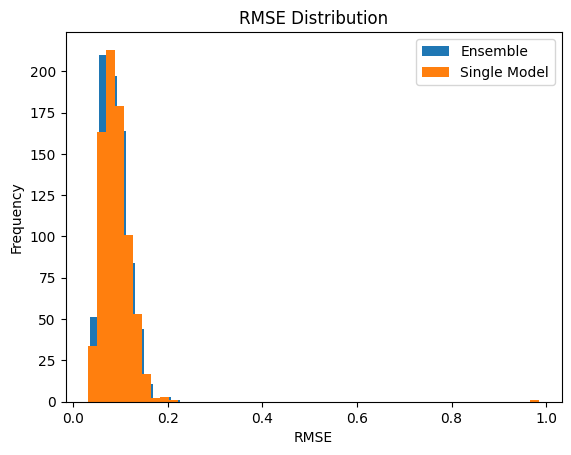

In [53]:
plt.hist(ensemble_rmse, bins=50, label='Ensemble')
plt.hist(single_model_rmse, bins=50, label='Single Model')
plt.xlabel('RMSE')
plt.ylabel('Frequency')
plt.title('RMSE Distribution')
plt.legend()
plt.show()




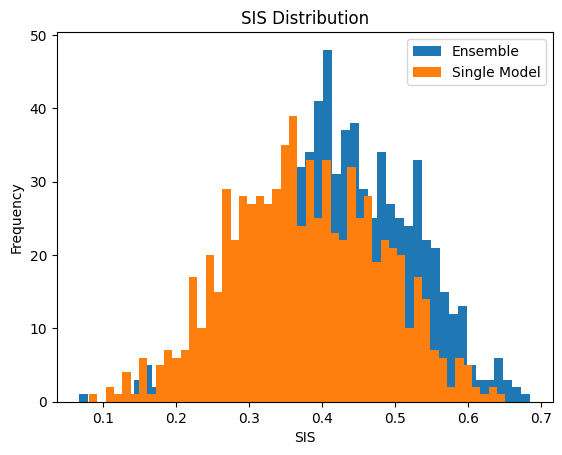

In [54]:
plt.hist(ensemble_sis, bins=50, label='Ensemble')
plt.hist(single_model_sis, bins=50, label='Single Model')
plt.xlabel('SIS')
plt.ylabel('Frequency')
plt.title('SIS Distribution')
plt.legend()
plt.show()


In [55]:
len(rndm_test_loader.dataset)

700

In [56]:
test_spec = []

for i, data in enumerate(rndm_test_loader.dataset):
    test_spec.append(data.y)

test_spec = [np.array(spec).squeeze() for spec in test_spec]



In [20]:
len(test_spec)

700

In [21]:
model_1_preds_rs = trainer_1.predict(mpnn1, rndm_test_loader)
model_2_preds_rs = trainer_2.predict(mpnn2, rndm_test_loader)
model_3_preds_rs = trainer_3.predict(mpnn3, rndm_test_loader)
model_4_preds_rs = trainer_4.predict(mpnn4, rndm_test_loader)
model_5_preds_rs = trainer_5.predict(mpnn5, rndm_test_loader)
model_6_preds_rs = trainer_6.predict(mpnn6, rndm_test_loader)
model_7_preds_rs = trainer_7.predict(mpnn7, rndm_test_loader)
model_8_preds_rs = trainer_8.predict(mpnn8, rndm_test_loader)

ensemble_preds_rs = [torch.mean(torch.stack(preds), dim=0) for preds in zip(model_1_preds_rs, model_2_preds_rs, model_3_preds_rs, model_4_preds_rs, model_5_preds_rs, model_6_preds_rs, model_7_preds_rs, model_8_preds_rs)]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 700/700 [00:03<00:00, 176.68it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting DataLoader 0: 100%|██████████| 700/700 [00:03<00:00, 185.78it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting DataLoader 0: 100%|██████████| 700/700 [00:03<00:00, 202.31it/s]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 700/700 [00:03<00:00, 202.25it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting DataLoader 0: 100%|██████████| 700/700 [00:03<00:00, 199.66it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting DataLoader 0: 100%|██████████| 700/700 [00:03<00:00, 197.02it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting DataLoader 0: 100%|██████████| 700/700 [00:03<00:00, 195.64it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting DataLoader 0: 100%|██████████| 700/700 [00:03<00:00, 201.55it/s]


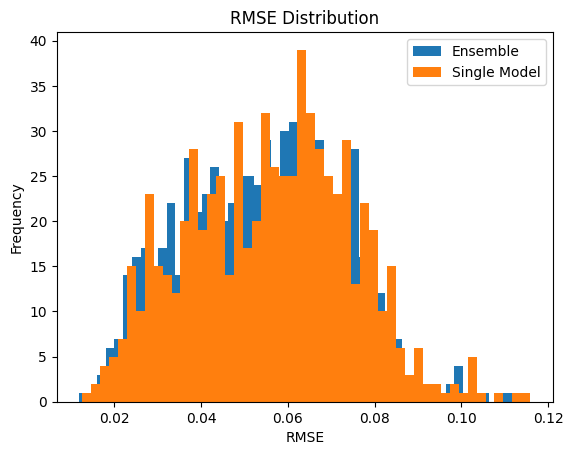

In [22]:
# convert preds to float
model_1_preds_rs = [pred.float() for pred in model_1_preds_rs]
model_2_preds_rs = [pred.float() for pred in model_2_preds_rs]
model_3_preds_rs = [pred.float() for pred in model_3_preds_rs]
model_4_preds_rs = [pred.float() for pred in model_4_preds_rs]
model_5_preds_rs = [pred.float() for pred in model_5_preds_rs]
model_6_preds_rs = [pred.float() for pred in model_6_preds_rs]
model_7_preds_rs = [pred.float() for pred in model_7_preds_rs]
model_8_preds_rs = [pred.float() for pred in model_8_preds_rs]

ensemble_preds_rs = [pred.float() for pred in ensemble_preds_rs]




ensemble_rmse_rs = calculate_rmse(ensemble_preds_rs, list(test_spec))

single_model_rmse_rs = calculate_rmse(model_1_preds_rs, list(test_spec))

ensemble_sis_rs = calculate_sis(ensemble_preds_rs, list(test_spec))

single_model_sis_rs = calculate_sis(model_1_preds_rs, list(test_spec))
                                    
plt.hist(ensemble_rmse_rs, bins=50, label='Ensemble')
plt.hist(single_model_rmse_rs, bins=50, label='Single Model')
plt.xlabel('RMSE')
plt.ylabel('Frequency')
plt.title('RMSE Distribution')
plt.legend()
plt.show()



(array([ 1.,  1.,  2.,  1.,  4.,  8.,  4.,  3.,  4.,  9.,  7., 16., 14.,
        15., 18., 34., 23., 27., 25., 21., 22., 25., 27., 24., 27., 24.,
        18., 24., 22., 24., 30., 21., 22., 21., 21., 15., 15., 14., 14.,
        10.,  4.,  8.,  6.,  4.,  6.,  5.,  3.,  3.,  3.,  1.]),
 array([0.27453952, 0.28562783, 0.29671614, 0.30780445, 0.31889277,
        0.32998108, 0.34106939, 0.3521577 , 0.36324601, 0.37433432,
        0.38542264, 0.39651095, 0.40759926, 0.41868757, 0.42977588,
        0.44086419, 0.45195251, 0.46304082, 0.47412913, 0.48521744,
        0.49630575, 0.50739407, 0.51848238, 0.52957069, 0.540659  ,
        0.55174731, 0.56283562, 0.57392394, 0.58501225, 0.59610056,
        0.60718887, 0.61827718, 0.62936549, 0.64045381, 0.65154212,
        0.66263043, 0.67371874, 0.68480705, 0.69589537, 0.70698368,
        0.71807199, 0.7291603 , 0.74024861, 0.75133692, 0.76242524,
        0.77351355, 0.78460186, 0.79569017, 0.80677848, 0.81786679,
        0.82895511]),
 <BarContainer

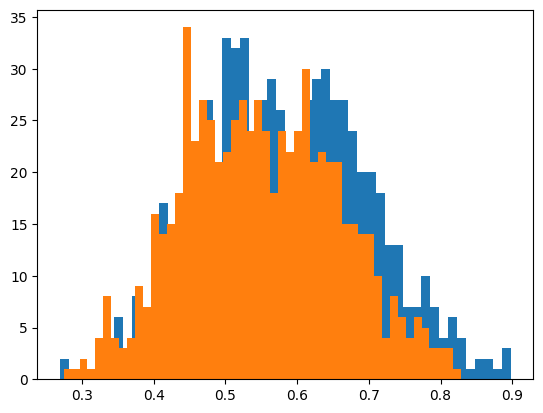

In [23]:
plt.hist(ensemble_sis_rs, bins=50, label='Ensemble')
plt.hist(single_model_sis_rs, bins=50, label='Single Model')

